## preamble

In [1]:
SetDirectory["~/Documents/Univ/2nd_GW_QCD"];

In [2]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
            {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {ImageSize->Large,
            Frame->True,
            LabelStyle->Directive[Black,Large,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[3],
            Joined->True}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

## practice

2
 x - xc  (-5 - 6 cs  + 3 w)/(2 + 6 w)
(-------)                             
 2 + 6 w
 
                            4     2                         2
             Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>   (BesselJ[-------------------------------------------------, cs (x - xc)] 
                                  2 + 6 w
 
                                           4     2                         2
                            Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>      C$28264[1] + BesselY[-------------------------------------------------, 
                                                 2 + 6 w
 
>       cs (x - xc)] C$28264[2])
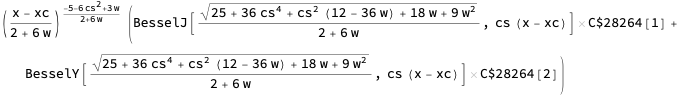

In [50]:
Phisol[x_,xc_,w_,cs_] = Simplify[Phi[x]/(2+6w)^(-(5+6cs^2-3w)/(2+6w)) /. DSolve[Phi''[x] + 6(1+cs^2)/(1+3w)/(x-xc) Phi'[x] + (cs^2+12(cs^2-w)/(1+3w)^2/(x-xc)^2)Phi[x] == 0, 
                    Phi[x], x, GeneratedParameters:>Unique[C]][[1]], {w>=0,cs>=0}]

In [51]:
ConstC1 = C$28264[1];
ConstC2 = C$28264[2];

3     1                          3     1
8 (BesselJ[-, -------] C$28264[1] + BesselY[-, -------] C$28264[2])
           2  Sqrt[3]                       2  Sqrt[3]
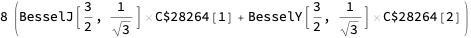

In [62]:
Phisol[1,0,1/3,1/Sqrt[3]]

In [62]:
Expand[(5+6cs^2-3w)^2-48(cs^2-w)]

2        4               2        2
25 + 12 cs  + 36 cs  + 18 w - 36 cs  w + 9 w

nu
       x
-----------------
 nu
2   Gamma[1 + nu]
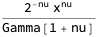

In [64]:
Normal[Series[BesselJ[nu,x],{x,0,1}]]

2
-5 - 6 cs  + 3 w
----------------
    2 + 6 w
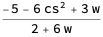

In [39]:
nu = Sqrt[25+12cs^2+36cs^4+18w-36cs^2 w+9w^2]/(2+6w);
Simplify[-Sqrt[nu^2+12(cs^2-w)/(1+3w)^2], {w>=0,5+6cs^2-3w>=0}]
Clear[nu]

In [38]:
Phi1[x_] = Phisol[x] /. {ConstC1 -> 1, ConstC2 -> 0};

x
                   Sqrt[3] Sin[-------]
           x                   Sqrt[3]
9 (-Cos[-------] + --------------------)
        Sqrt[3]             x
----------------------------------------
                    2
                   x
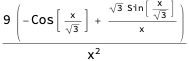

In [39]:
PhiRD[x_] = (Phi1[x] /. {w->1/3, cs->1/Sqrt[3], xc->0}) / Limit[Phi1[x] /. {w->1/3, cs->1/Sqrt[3], xc->0}, x->0]

2
                     t - xc  (5 + 6 cs  - 3 w)/(2 + 6 w)
{{C$22725[1] -> (-2 (-------)                            
                     2 + 6 w
 
                            2
          -xc + xt (5 + 6 cs  - 3 w)/(2 + 6 w)
>        (--------)                            
          2 + 6 w
 
                                2
              t - xc  (-5 - 6 cs  + 3 w)/(2 + 6 w)
>        ((9 (-------)                             
              2 + 6 w
 
                           2
>             ((2 (5 + 6 cs  - 3 w) 
 
                                          4     2                         2
                           Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>                  BesselY[-------------------------------------------------, 
                                                2 + 6 w
 
>                   cs (t - xc)]) / (t - xc) - 
 
>               2 cs (1 + 3 w) (BesselY[-1 + 
 
                                    4     2                         2
                     Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>                    -------------------------------------------------, cs (t - xc)] - 
                                          2 + 6 w
 
                                              4     2                         2
                               Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>                  BesselY[1 + -------------------------------------------------, 
                                                    2 + 6 w
 
                                             xt                     xt
>                   cs (t - xc)])) (xt Cos[-------] - Sqrt[3] Sin[-------])) / 
                                           Sqrt[3]                Sqrt[3]
 
                                                       2
                           3        -xc + xt (-5 - 6 cs  + 3 w)/(2 + 6 w)
>           (2 (2 + 6 w) xt ) - (3 (--------)                             
                                    2 + 6 w
 
                                     4     2                         2
                      Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>             BesselY[-------------------------------------------------, cs (-xc + xt)] 
                                           2 + 6 w
 
                          xt                       2        xt           4
>             (9 xt Cos[-------] + Sqrt[3] (-9 + xt ) Sin[-------])) / xt )) / 
                        Sqrt[3]                           Sqrt[3]
 
                                                     4     2                         2
                     2                Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>      (-((((5 + 6 cs  - 3 w) BesselJ[-------------------------------------------------, 
                                                           2 + 6 w
 
>                 cs (t - xc)]) / ((1 + 3 w) (t - xc)) + 
 
                                               4     2                         2
                                Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>             cs (-BesselJ[-1 + -------------------------------------------------, 
                                                     2 + 6 w
 
>                  cs (t - xc)] + BesselJ[1 + 
 
                                  4     2                         2
                   Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>                  -------------------------------------------------, cs (t - xc)])) 
                                        2 + 6 w
 
                                   4     2                         2
                    Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>           BesselY[-------------------------------------------------, cs (-xc + xt)]) + 
                                         2 + 6 w
 
                                4     2                         2
                 Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>        BesselJ[-------------------------------------------------, cs (-xc +
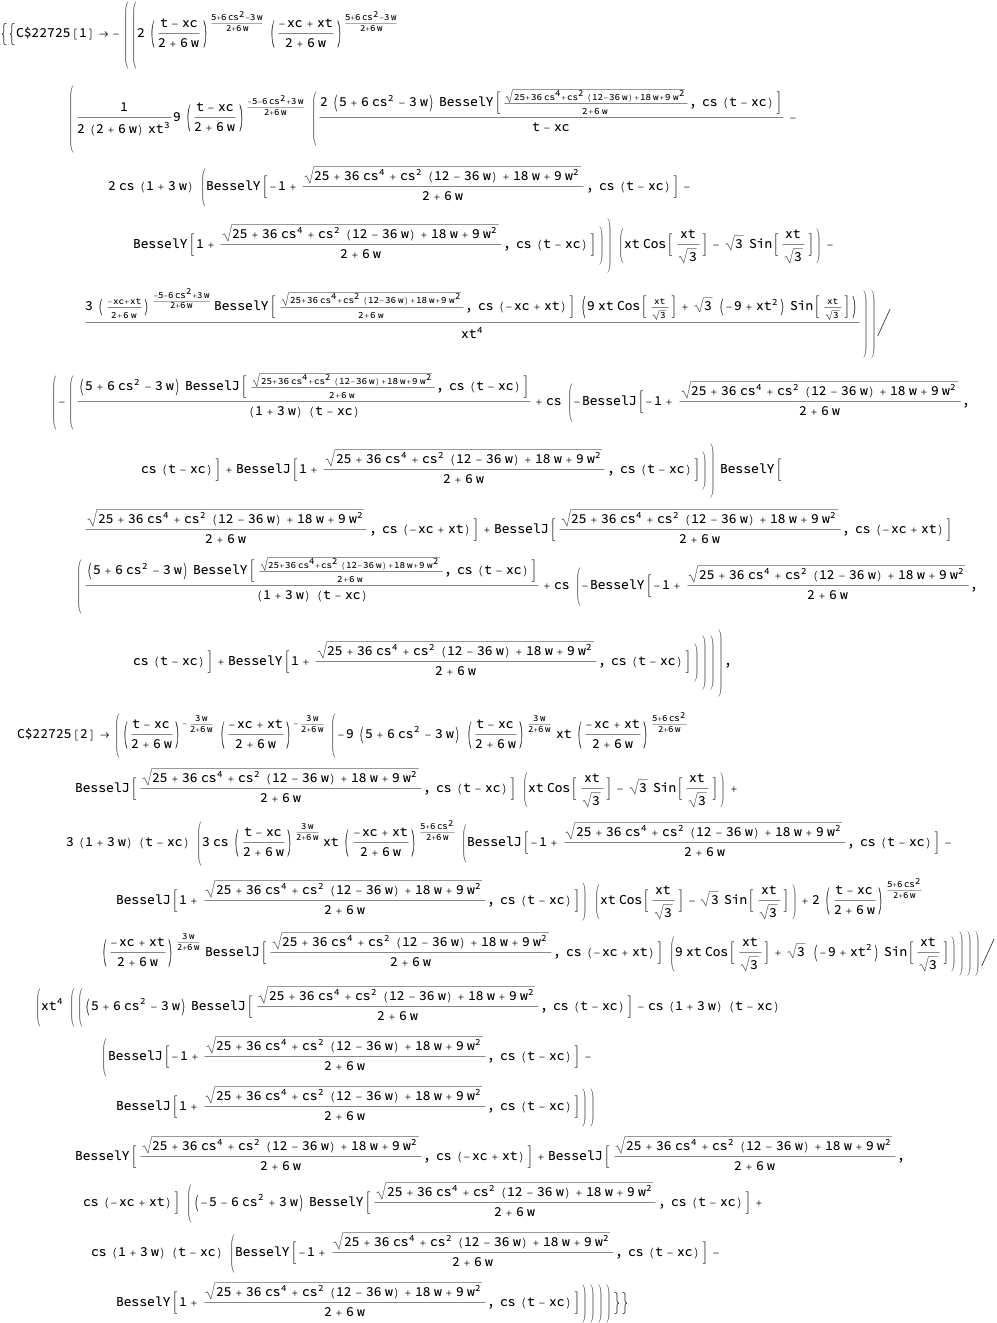

In [40]:
Solve[PhiRD[xt] == Phisol[xt] && PhiRD'[xt] == Phisol'[t], {ConstC1,ConstC2}] // Simplify

1/2 - 3/(1 + 3 w)
(2                  Sqrt[-I (x - xc)] 
 
        1/(1 + 3 w)         3 (-1 + w)
>     (8            BesselK[----------, -I (x - xc)] C[2] + 
                             2 + 6 w
 
         w/(1 + 3 w)                  3 (-1 + w)                          -1 + 9 w
>       8            Sqrt[Pi] BesselI[----------, -I (x - xc)] C[1] Gamma[--------])) / 
                                       2 + 6 w                            2 + 6 w
 
>   Sqrt[Pi]
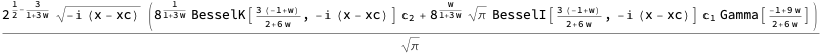

In [303]:
Gsol[x_] = Simplify[FunctionExpand[G[x] /. DSolve[G''[x]+(1-2(1-3w)/(1+3w)^2/(x-xc)^2)G[x] == 0, G[x], x][[1]]], {xc>0,x>xc}]

In [8]:
3(-1+w)/(2+6w) /. {w->1/3}

1
-(-)
  2

In [17]:
G1[x_] = Sqrt[x-xc] BesselJ[nu,x-xc];
G2[x_] = Sqrt[x-xc] BesselY[nu,x-xc];

In [19]:
FunctionExpand[D[G1[x],x,x]+(1-2(1-3w)/(1+3w)^2/(x-xc)^2)G1[x] /. {nu->3(-1+w)/(2+6w)}]

0

(Pi Sqrt[(eta k - xc) (etap k - xc)] 
 
>     (BesselJ[nu, etap k - xc] BesselY[nu, eta k - xc] - 
 
>       BesselJ[nu, eta k - xc] BesselY[nu, etap k - xc])) / (2 k)
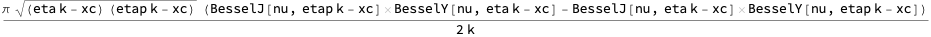

In [86]:
GreenGmode[k_,eta_,etap_,xc_,nu_] = FullSimplify[(G1[k eta]G2[k etap] - G2[k eta]G1[k etap]) / (D[G1[k etap],etap]G2[k etap] - G1[k etap]D[G2[k etap],etap]), 
                                                {eta>xc/k, etap>xc/k, k>0, xc>0}]

Sin[(eta - etap) k]
-------------------
         k
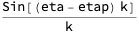

In [72]:
GreenGRD[k_,eta_,etap_] = Simplify[GreenGMode[k,eta,etap] /. {xc->0, nu->-1/2}, {eta>0,etap>0,k>0}]

-Graphics-
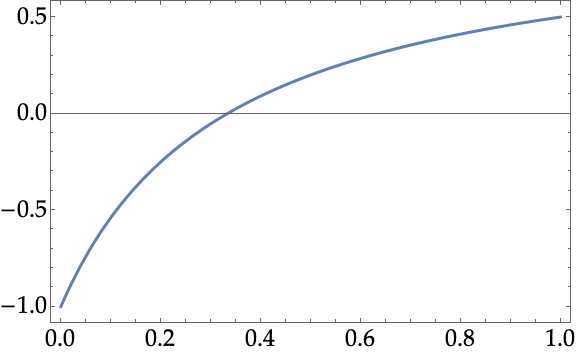

In [32]:
Plot[-(1-3w)/(1+3w),{w,0,1}]

n
      x
---------------
 n
2  Gamma[1 + n]
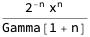

In [14]:
Normal[Series[BesselJ[n,x],{x,0,1}]]

n                         n
  x  Cos[n Pi] Gamma[-n]    2  Gamma[n]
-(----------------------) - -----------
           n                       n
          2  Pi                Pi x
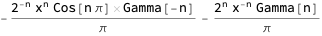

In [15]:
Normal[Series[BesselY[n,x],{x,0,1}]]

In [59]:
abefore[eta_] = a0 eta/eta0;
aafter[eta_] = a0 ((eta-etac)/eta0)^(2/(1+3w));

Inverse functions are being used by `1`, so some solutions may not be found; use Reduce for complete solution information.: Inverse functions are being used by Solve, so some solutions may not be found; use Reduce for complete solution information.

Sqrt[etat]  1 + 3 w
{{etac -> -(eta0 (-(----------))       ) + etat}, 
                    Sqrt[eta0]
 
                     Sqrt[etat] 1 + 3 w
>   {etac -> -(eta0 (----------)       ) + etat}}
                     Sqrt[eta0]
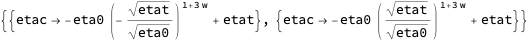

In [63]:
Solve[Simplify[abefore[etat] == aafter[etat] && abefore'[etat] == aafter'[etat]], etac]

-etac + etat -1 + 2/(1 + 3 w)
                                                    2 a0t (------------)
a0 etat         -etac + etat 2/(1 + 3 w)     a0               eta0t
------- == a0t (------------)            && ---- == ------------------------------------
 eta0              eta0t                    eta0             eta0t + 3 eta0t w
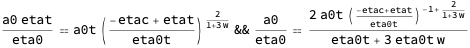

In [58]:
Simplify[abefore[etat] == aafter[etat] && abefore'[etat] == aafter'[etat]]

## sudden change

In [51]:
etac[etas_,w_] = -(1-3w)/(1+3w) etas;
xc[xs_,w_] = -(1-3w)/(1+3w) xs;
scalea[eta_,etas_,w_] := eta/etas /; eta<=etas
scalea[eta_,etas_,w_] := (2/(1+3w))^(-2/(1+3w))((eta-etac[etas,w])/etas)^(2/(1+3w)) /; eta>etas;
calH[eta_,etas_,w_] := 1/eta /; eta<=etas
calH[eta_,etas_,w_] := 2/(1+3w)/(eta-etac[eta,w]) /; eta>etas
EoSw[eta_,etas_,w_] := 1/3 /; eta<=etas
EoSw[eta_,etas_,w_] := w /; eta>etas

-Graphics-
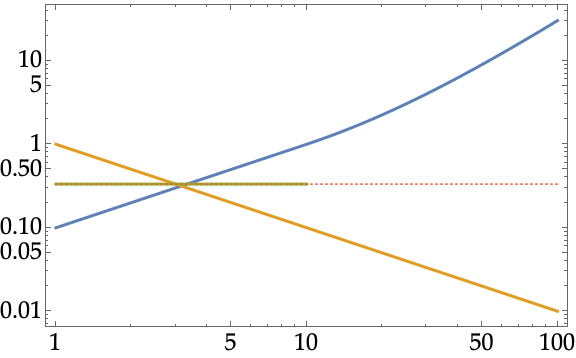

In [59]:
LogLogPlot[{scalea[eta,10,0],calH[eta,10,0],EoSw[eta,10,0],EoSw[eta,10,1/3]}, {eta,1,100},
            PlotStyle->{AbsoluteThickness[3],AbsoluteThickness[3],AbsoluteThickness[3],Dotted}]

2
 x - xc  (-5 - 6 cs  + 3 w)/(2 + 6 w)
(-------)                             
 2 + 6 w
 
                            4     2                         2
             Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>   (BesselJ[-------------------------------------------------, cs (x - xc)] 
                                  2 + 6 w
 
                                           4     2                         2
                            Sqrt[25 + 36 cs  + cs  (12 - 36 w) + 18 w + 9 w ]
>      C$15335[1] + BesselY[-------------------------------------------------, 
                                                 2 + 6 w
 
>       cs (x - xc)] C$15335[2])
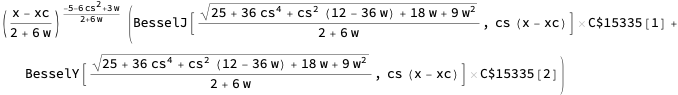

In [60]:
Phisol[x_,xc_,w_,cs_] = Simplify[Phi[x]/(2+6w)^(-(5+6cs^2-3w)/(2+6w)) /. DSolve[Phi''[x] + 6(1+cs^2)/(1+3w)/(x-xc) Phi'[x] + (cs^2+12(cs^2-w)/(1+3w)^2/(x-xc)^2)Phi[x] == 0, 
                    Phi[x], x, GeneratedParameters:>Unique[C]][[1]], {w>=0,cs>=0}]

In [61]:
ConstC1 = C$15335[1];
ConstC2 = C$15335[2];

x
                   Sqrt[3] Sin[-------]
           x                   Sqrt[3]
9 (-Cos[-------] + --------------------)
        Sqrt[3]             x
----------------------------------------
                    2
                   x
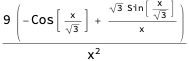

In [63]:
PhiRD[x_] = (Phisol[x,0,1/3,1/Sqrt[3]] /. {ConstC1->1, ConstC2->0}) / Limit[Phisol[x,0,1/3,1/Sqrt[3]] /. {ConstC1->1, ConstC2->0}, x->0]

In [64]:
Phipsol[x_,xc_,w_,cs_] = D[Phisol[x,xc,w,cs],x] // Simplify;

In [65]:
Csol = Solve[PhiRD[xs] == Phisol[xs,xc[xs,w],w,cs] && PhiRD'[xs] == Phipsol[xs,xc[xs,w],w,cs], {ConstC1,ConstC2}][[1]] // Simplify;

In [66]:
Phijunc[x_,xs_,w_,cs_] = Phisol[x,xc[xs,w],w,cs] /. Csol // Simplify;
Phipjunc[x_,xs_,w_,cs_] = Phipsol[x,xc[xs,w],w,cs] /. Csol // Simplify;

In [68]:
Phifull[x_,xs_,w_,cs_] := PhiRD[x] /; x<=xs
Phifull[x_,xs_,w_,cs_] := Phijunc[x,xs,w,cs] /; x>xs
Phipfull[x_,xs_,w_,cs_] := PhiRD'[x] /; x<=xs
Phipfull[x_,xs_,w_,cs_] := Phipjunc[x,xs,w,cs] /; x>xs

-Graphics-
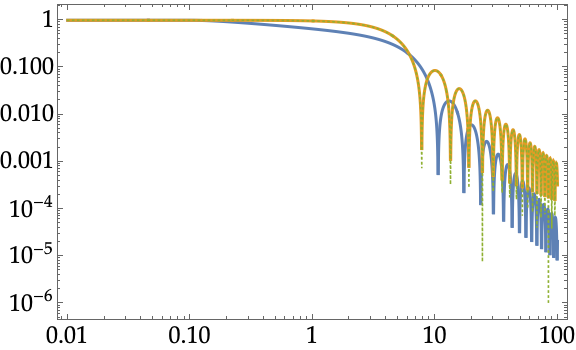

In [72]:
LogLogPlot[{Abs[Phifull[x,0.1,0.1,0.5]], Abs[Phifull[x,0.1,1/3,1/Sqrt[3]]], Abs[PhiRD[x]]},{x,0.01,100}, 
            PlotRange->Full, PlotStyle->{AbsoluteThickness[3],AbsoluteThickness[3],Dotted}]

-Graphics-
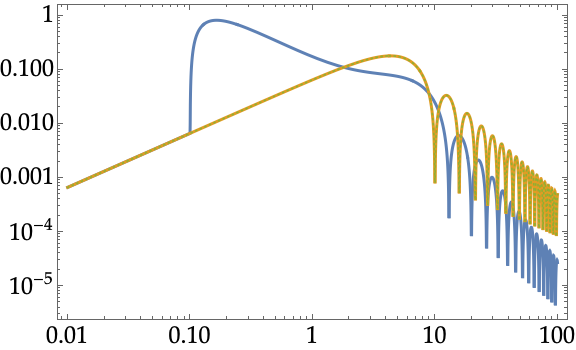

In [73]:
LogLogPlot[{Abs[Phipfull[x,0.1,0.1,0.5]], Abs[Phipfull[x,0.1,1/3,1/Sqrt[3]]], Abs[PhiRD'[x]]},{x,0.01,100}, 
            PlotRange->Full, PlotStyle->{AbsoluteThickness[3],AbsoluteThickness[3],Dotted}]

3 (-1 + w)
Sqrt[x - xc] BesselJ[-----------, x - xc] D$18546[1] + 
                     2 (1 + 3 w)
 
                         3 (-1 + w)
>   Sqrt[x - xc] BesselY[-----------, x - xc] D$18546[2]
                         2 (1 + 3 w)
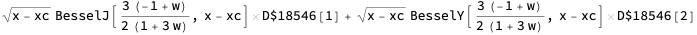

In [74]:
gsol[x_] = g[x] /. DSolve[g''[x]+(1-2(1-3w)/(1+3w)^2/x^2)g[x] == 0, g[x], x, GeneratedParameters:>Unique[D]][[1]] /. {x->x-xc}

In [75]:
ConstD1 = D$18546[1];
ConstD2 = D$18546[2];

In [77]:
g1RD[x_] = Sin[x];
g2RD[x_] = Cos[x];

In [79]:
D[g1RD[k eta],eta]g2RD[k eta] - g1RD[k eta]D[g2RD[k eta],eta] // Simplify

k

In [80]:
Dsol1 = Solve[(g1RD[k etas] == gsol[k etas] && D[g1RD[k etas], etas] == D[gsol[k etas], etas]) /. {xc->k etac[etas,w]}, {ConstD1, ConstD2}][[1]] // Simplify;
Dsol2 = Solve[(g2RD[k etas] == gsol[k etas] && D[g2RD[k etas], etas] == D[gsol[k etas], etas]) /. {xc->k etac[etas,w]}, {ConstD1, ConstD2}][[1]] // Simplify;

In [82]:
g1junc[k_,eta_,etas_,w_] = gsol[k eta] /. Dsol1 /. {xc->k etac[etas,w]} // Simplify;
g2junc[k_,eta_,etas_,w_] = gsol[k eta] /. Dsol2 /. {xc->k etac[etas,w]} // Simplify;
g1pjunc[k_,eta_,etas_,w_] = D[gsol[k eta], eta] /. Dsol1 /. {xc->k etac[etas,w]} // Simplify;
g2pjunc[k_,eta_,etas_,w_] = D[gsol[k eta], eta] /. Dsol2 /. {xc->k etac[etas,w]} // Simplify;

-Graphics-
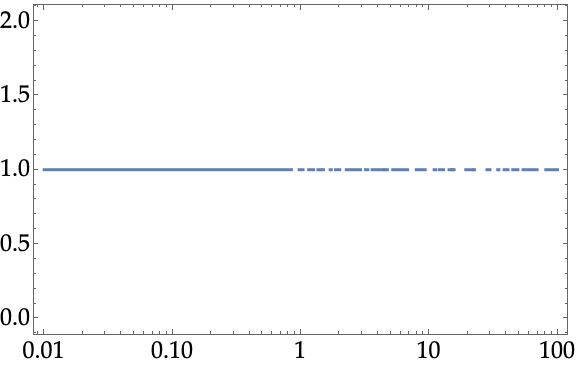

In [86]:
LogLinearPlot[g1pjunc[1,eta,0.1,0]g2junc[1,eta,0.1,0]-g2pjunc[1,eta,0.1,0]g1junc[1,eta,0.1,0], {eta,0.01,100}]

In [87]:
g1full[k_,eta_,etas_,w_] := g1RD[k eta] /; eta<=etas
g1full[k_,eta_,etas_,w_] := g1junc[k,eta,etas,w] /; eta>etas
g2full[k_,eta_,etas_,w_] := g2RD[k eta] /; eta<=etas
g2full[k_,eta_,etas_,w_] := g2junc[k,eta,etas,w] /; eta>etas

-Graphics-
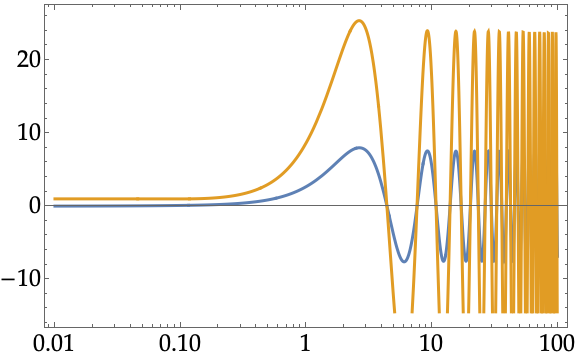

In [91]:
LogLinearPlot[{g1full[1,eta,0.1,0],g2full[1,eta,0.1,0]},{eta,0.01,100}]

In [93]:
GreenGmode[k_,eta_,etap_,etas_,w_] := (g1full[k,eta,etas,w]g2full[k,etap,etas,w] 
                                        - g2full[k,eta,etas,w]g1full[k,etap,etas,w])/k

-Graphics-
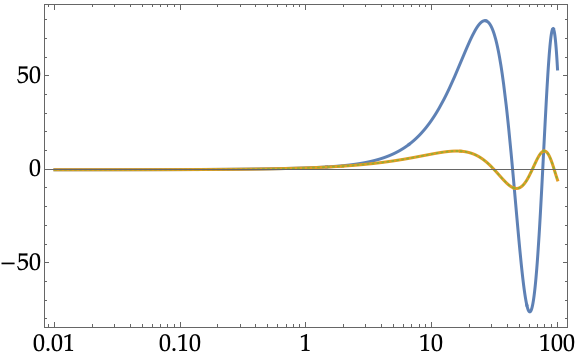

In [94]:
LogLinearPlot[{GreenGmode[0.1,eta,0.01,1,0], GreenGmode[0.1,eta,0.01,1,1/3], 1/0.1 Sin[0.1(eta-0.01)]}, 
                {eta,0.01,100}, PlotRange->Full, PlotStyle->{AbsoluteThickness[3],AbsoluteThickness[3],Dotted}]

In [95]:
dx = \[Pi];

In [96]:
Imono[k_,eta_,etas_,w_,cs_] := k^3 NIntegrate[scalea[etap,etas,w] GreenGmode[k,eta,etap,etas,w] 
                                                (2Phifull[etap,etas,w,cs]^2 
                                                + 4/3/(1+EoSw[etap,etas,w])(Phifull[etap,etas,w,cs] + 1/calH[etap,etas,w] Phipfull[etap,etas,w,cs])^2 ), 
                                            {etap,0.01,eta}]
Imono2bar[k_,eta_,etas_,w_,cs_] := (Imono[k,eta-dx/2/k,etas,w,cs]^2 + Imono[k,eta-dx/4/k,etas,w,cs]^2 + Imono[k,eta,etas,w,cs]^2 
                                    + Imono[k,eta+dx/4/k,etas,w,cs]^2 + Imono[k,eta+dx/2/k,etas,w,cs]^2) /5;

In [98]:
OGWmonobar[k_,eta_,etas_,w_,cs_] := 8/243 (scalea[eta,etas,w]calH[eta,etas,w])^(-2) UnitStep[1-k/2]*
                                    (1-(k/2)^2)^2 (1/k)^2 Imono2bar[k,eta,etas,w,cs]

In [65]:
etas1 = 1;
w1 = 0.23;
cs1 = Sqrt[0.24];

{2548.03, Null}
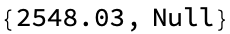

In [68]:
OGW1List = Table[{10^logk,OGWmonobar[10^logk,400,etas1,w1,cs1] // Quiet}, {logk,-1,Log10[2],0.01}]; // AbsoluteTiming

In [69]:
OGW1List[[1]]

{0.1, 0.0470458}

In [103]:
Export["git/num/anal/OGWw23cs24.dat", OGW1List];

In [71]:
etas2 = 1;
w2 = 1/3;
cs2 = Sqrt[0.25];

{3961.57, Null}
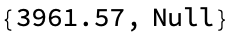

In [74]:
OGW2List = Table[{10^logk,OGWmonobar[10^logk,400,etas2,w2,cs2] // Quiet}, {logk,-1,Log10[2],0.01}]; // AbsoluteTiming

In [75]:
OGW2List[[1]]

{0.1, 0.25525}

In [104]:
Export["git/num/anal/OGWcs25.dat", OGW2List];

In [77]:
etas3 = 1;
w3 = 0.25;
cs3 = 1/Sqrt[3];

{2694.19, Null}
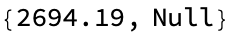

In [80]:
OGW3List = Table[{10^logk,OGWmonobar[10^logk,400,etas3,w3,cs3] // Quiet}, {logk,-1,Log10[2],0.01}]; // AbsoluteTiming

In [81]:
OGW3List[[1]]

{0.1, 0.026259}

In [105]:
Export["git/num/anal/OGWw25.dat", OGW3List];

In [53]:
etasRD = 1;
wRD = 1/3;
csRD = 1/Sqrt[3];

In [56]:
OGWmonobar[0.2,400,etasRD,wRD,csRD] // AbsoluteTiming

{25.1813, 0.311809}

{4580.47, Null}
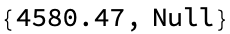

In [57]:
OGWRDList = Table[{10^logk,OGWmonobar[10^logk,400,etasRD,wRD,csRD] // Quiet}, 
                    {logk,-1,Log10[2],0.01}]; // AbsoluteTiming

In [58]:
OGWRDList[[1]]

{0.1, 0.10478}

In [106]:
Export["git/num/anal/OGWRD.dat", OGWRDList];

In [99]:
IsRD[k_,eta_] = k^2 Integrate[etap Sin[k etap] (2PhiRD[etap]^2 + (PhiRD[etap] + etap PhiRD'[etap])^2),
                            {etap,0.01,eta}, Assumptions->{eta>1,k>0}];
IcRD[k_,eta_] = k^2 Integrate[etap Cos[k etap] (2PhiRD[etap]^2 + (PhiRD[etap] + etap PhiRD'[etap])^2),
                            {etap,0.01,eta}, Assumptions->{eta>1,k>0}];
IRD2bar[k_,eta_] = Abs[(IsRD[k,eta]^2 + IcRD[k,eta]^2)/2];

In [102]:
OGWRD[k_,eta_] = 8/243 UnitStep[1-k/2] (1-(k/2)^2)^2 (1/k)^2 IRD2bar[k,eta];

In [103]:
OGWRDanalList = Table[{10^logk, OGWRD[10^logk,400]}, {logk,-1,Log10[2],0.01}]; // AbsoluteTiming

{0.748993, Null}

In [104]:
OGW2List = Import["num/anal/OGWcs25.dat"];
OGW3List = Import["num/anal/OGWw25.dat"];
OGWRDList = Import["num/anal/OGWRD.dat"];

Legended[-Graphics-, Placed[LineLegend[{Directive[PointSize[0.0055], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.0055], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2], Dashing[{Small, Small}]], 
 
>      Directive[PointSize[0.0055], AbsoluteThickness[2], GrayLevel[0.5]], 
 
>      Directive[PointSize[0.0055], AbsoluteThickness[1], Dashing[{0, Small}], 
 
                           2                            2    1
>       GrayLevel[0]]}, {c   == 0.25, w == 0.25, w == c   == -, RDanal}, 
                          s                            s     3
 
>     LegendMarkers -> 
 
>      {{False, Automatic}, {False, Automatic}, {False, Automatic}, {False, Automatic}}, 
 
>     Joined -> {True, True, True, True}, 
 
>     LabelStyle -> Directive[Larger, FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.25, 0.25}, Identity]]
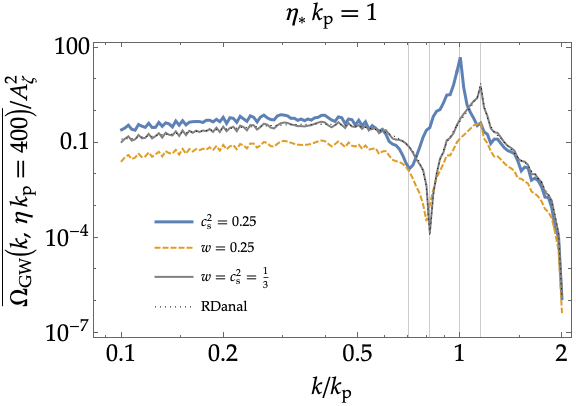

In [112]:
FigOGW = 
ListLogLogPlot[{OGW2List,OGW3List,OGWRDList,OGWRDanalList}, 
                PlotStyle->{AbsoluteThickness[3], {AbsoluteThickness[2],Dashed}, {AbsoluteThickness[2],Gray},
                            {AbsoluteThickness[1],Dotted,Black}}, 
                FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW][k,Subscript[k,"p"]\[Eta]==400]], 
                                            "/", Subscript[A,\[Zeta]]^2}], None},
                            {Row[{k, "/", Subscript[k,"p"]}], 
                                Subscript[\[Eta], "\[RawStar]"]Subscript[k,"p"] == 1}},
                PlotLegends->Placed[LineLegend[{Subscript[c,"s"]^2==0.25, w==0.25, w==Subscript[c,"s"]^2==1/3, 
                                                "RDanal"}, LabelStyle->Directive[Larger, FontFamily->"Palatino"]], 
                                    {0.25,0.25}],
                GridLines->{{2/Sqrt[3],2Sqrt[0.25],Sqrt[2]/Sqrt[3],Sqrt[2]Sqrt[0.25]},None}]

In [113]:
Export["paper/GWqcd_note/figYT/OGWsudden.pdf", FigOGW];

## w = 1/3

In [6]:
w = 1/3;

2                          4
 -1 - (3 cs )/2          Sqrt[8 + 9 cs ]
x               (BesselJ[---------------, cs x] C$8244[1] + 
                                2
 
                           4
              Sqrt[8 + 9 cs ]
>     BesselY[---------------, cs x] C$8244[2])
                     2
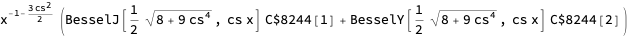

In [7]:
Simplify[Phi[x] /. DSolve[Phi''[x] + 6(1+cs^2)/(1+3w)/x Phi'[x] + (cs^2+12(cs^2-w)/(1+3w)^2/x^2)Phi[x] == 0, Phi[x], x, GeneratedParameters:>Unique[C]][[1]], {cs>=0}]

In [8]:
Phi1[x_,cs_] = x^(-1-3cs^2/2)BesselJ[Sqrt[8+9cs^4]/2,cs x];
Phi2[x_,cs_] = x^(-1-3cs^2/2)BesselY[Sqrt[8+9cs^4]/2,cs x];
Phisol[x_,cs_] = C1 Phi1[x,cs] + C2 Phi2[x,cs];

x
                   Sqrt[3] Sin[-------]
           x                   Sqrt[3]
9 (-Cos[-------] + --------------------)
        Sqrt[3]             x
----------------------------------------
                    2
                   x
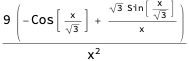

In [11]:
PhiRD[x_] = Phi1[x,1/Sqrt[3]] / Limit[Phi1[x,1/Sqrt[3]], x->0]

In [12]:
Phipsol[x_,cs_] = D[Phisol[x,cs],x] // Simplify;

In [13]:
Csol = Solve[PhiRD[xs] == Phisol[xs,cs] && PhiRD'[xs] == Phipsol[xs,cs], {C1,C2}][[1]] // Simplify;

In [14]:
Phijunc[x_,xs_,cs_] = Phisol[x,cs] /. Csol // Simplify;
Phipjunc[x_,xs_,cs_] = Phipsol[x,cs] /. Csol // Simplify;

In [16]:
Phifull[x_,xs_,cs_] = UnitStep[xs-x]PhiRD[x] + (1-UnitStep[xs-x])Phijunc[x,xs,cs];
Phipfull[x_,xs_,cs_] = UnitStep[xs-x]PhiRD'[x] + (1-UnitStep[xs-x])Phipjunc[x,xs,cs];

-Graphics-
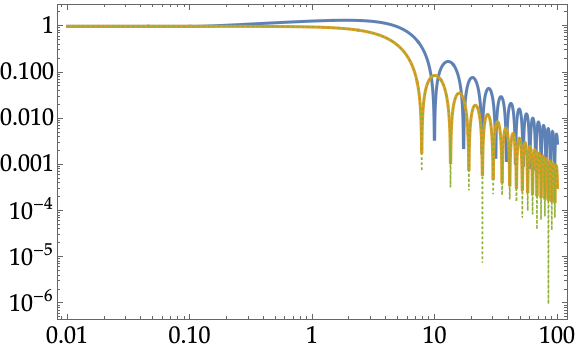

In [18]:
LogLogPlot[{Abs[Phifull[x,0.1,Sqrt[0.2]]], Abs[Phifull[x,0.1,1/Sqrt[3]]], Abs[PhiRD[x]]},{x,0.01,100}, 
            PlotRange->Full, PlotStyle->{AbsoluteThickness[3],AbsoluteThickness[3],Dotted}]

-Graphics-
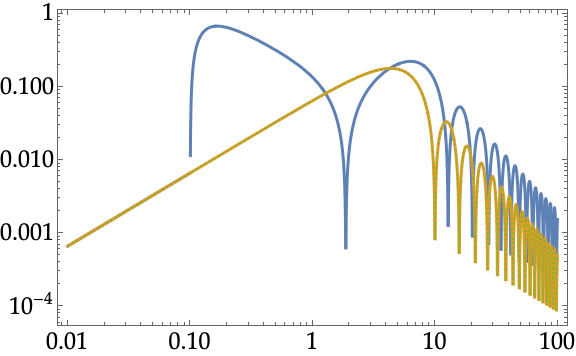

In [19]:
LogLogPlot[{Abs[Phipfull[x,0.1,Sqrt[0.2]]], Abs[Phipfull[x,0.1,1/Sqrt[3]]], Abs[PhiRD'[x]]},{x,0.01,100}, 
            PlotRange->Full, PlotStyle->{AbsoluteThickness[3],AbsoluteThickness[3],Dotted}]

In [61]:
Isint[k_,etap_,etas_,cs_] = etap Sin[k etap] (2Phifull[etap,etas,cs]^2 + (Phifull[etap,etas,cs] + etap Phipfull[etap,etas,cs])^2);
Icint[k_,etap_,etas_,cs_] = etap Cos[k etap] (2Phifull[etap,etas,cs]^2 + (Phifull[etap,etas,cs] + etap Phipfull[etap,etas,cs])^2);

In [78]:
Iscs[k_,eta_,etas_,cs_] := k^2 NIntegrate[Isint[k,etap,etas,cs], {etap,0,eta}];
Iccs[k_,eta_,etas_,cs_] := k^2 NIntegrate[Icint[k,etap,etas,cs], {etap,0,eta}];
Ics2bar[k_,eta_,etas_,cs_] := Abs[(Iscs[k,eta,etas,cs]^2 + Iccs[k,eta,etas,cs]^2)/2];

In [81]:
OGWcsbar[k_,eta_,etas_,cs_] := 8/243 UnitStep[1-k/2] (1-(k/2)^2)^2 (1/k)^2 Ics2bar[k,eta,etas,cs]

In [67]:
etas1 = 10;
cs1 = 0.5;

In [82]:
OGWcsbar[1,400,etas1,cs1]

12.3162

In [74]:
OGW1List = Table[{10^logk,OGWcsbar[10^logk,400,etas1,cs1]}, {logk,-1,Log10[2],0.01}]; // AbsoluteTiming

{223.286, Null}

In [83]:
IsRD[k_,eta_] = k^2 Integrate[etap Sin[k etap] (2PhiRD[etap]^2 + (PhiRD[etap] + etap PhiRD'[etap])^2), {etap,0.01,eta}, Assumptions->{eta>1,k>0}];
IcRD[k_,eta_] = k^2 Integrate[etap Cos[k etap] (2PhiRD[etap]^2 + (PhiRD[etap] + etap PhiRD'[etap])^2), {etap,0.01,eta}, Assumptions->{eta>1,k>0}];
IRD2bar[k_,eta_] = Abs[(IsRD[k,eta]^2 + IcRD[k,eta]^2)/2];

In [86]:
OGWRD[k_,eta_] = 8/243 UnitStep[1-k/2] (1-(k/2)^2)^2 (1/k)^2 IRD2bar[k,eta];

In [87]:
OGWRDList = Table[{10^logk, OGWRD[10^logk,400]}, {logk,-1,Log10[2],0.01}]; // AbsoluteTiming

{0.679668, Null}

In [95]:
Clear[w]

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.00733333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.00733333], AbsoluteThickness[1.6], GrayLevel[0], 
 
                                  2
>       Dashing[{0, Small}]]}, {c   == 1/3 → 0.25, RD}, 
                                 s
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>     LegendLayout -> Column], {0.3, 0.2}, Identity]]
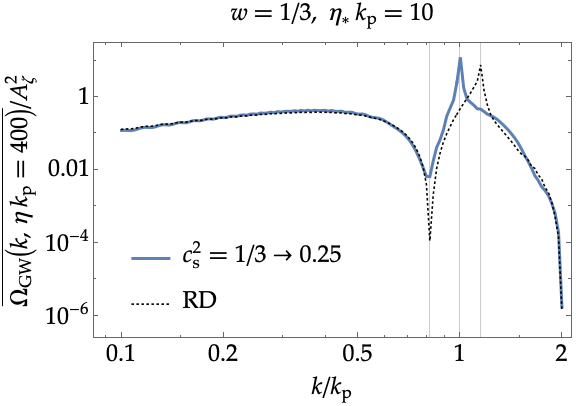

In [99]:
FigOGWetas10cs25 = 
ListLogLogPlot[{OGW1List, OGWRDList}, GridLines->{{2cs1,Sqrt[2/3],2/Sqrt[3]},None}, PlotStyle->{AbsoluteThickness[3],{Black,Dotted}},
                FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW][k,Subscript[k,"p"]\[Eta]==400]], "/", Subscript[A,\[Zeta]]^2}], None},
                            {Row[{k, "/", Subscript[k,"p"]}], Row[{w==1, "/", 3, ",  ", Subscript[\[Eta], "\[RawStar]"]Subscript[k,"p"] == 10}]}},
                PlotLegends->Placed[{Row[{Subscript[c,"s"]^2==1, "/", 3\[RightArrow]0.25}], "RD"}, {0.3,0.2}]]

In [100]:
Export["anal/OGWetas10cs25.pdf", FigOGWetas10cs25];

## double change

In [6]:
w = 1/3;

2                          4
 -1 - (3 cs )/2          Sqrt[8 + 9 cs ]
x               (BesselJ[---------------, cs x] C[1] + 
                                2
 
                           4
              Sqrt[8 + 9 cs ]
>     BesselY[---------------, cs x] C[2])
                     2
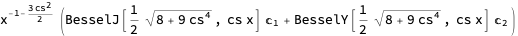

In [7]:
Simplify[Phi[x] /. DSolve[Phi''[x] + 6(1+cs^2)/(1+3w)/x Phi'[x] + (cs^2+12(cs^2-w)/(1+3w)^2/x^2)Phi[x] == 0, Phi[x], x][[1]], {cs>=0}]

In [8]:
Phi1[x_,cs_] = x^(-1-3cs^2/2)BesselJ[Sqrt[8+9cs^4]/2,cs x];
Phi2[x_,cs_] = x^(-1-3cs^2/2)BesselY[Sqrt[8+9cs^4]/2,cs x];
Phisol[x_,cs_] = C1 Phi1[x,cs] + C2 Phi2[x,cs];

x
                   Sqrt[3] Sin[-------]
           x                   Sqrt[3]
9 (-Cos[-------] + --------------------)
        Sqrt[3]             x
----------------------------------------
                    2
                   x
                                  x
                   Sqrt[3] Cos[-------]
         1/4                   Sqrt[3]            x
Sqrt[2] 3    D2 (-(--------------------) - Sin[-------])
                            x                  Sqrt[3]
-------------------------------------------------------- + 
                                2
                      Sqrt[Pi] x
 
                                                    x
                                     Sqrt[3] Sin[-------]
             1/4             x                   Sqrt[3]
    Sqrt[2] 3    D1 (-Cos[-------] + --------------------)
                          Sqrt[3]             x
>   ------------------------------------------------------
                                   2
                         Sqrt[Pi] x
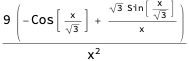
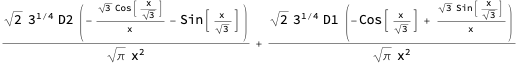

In [11]:
PhiRD[x_] = Phi1[x,1/Sqrt[3]] / Limit[Phi1[x,1/Sqrt[3]], x->0]
PhiRDlate[x_] = Phisol[x,1/Sqrt[3]] /. {C1->D1, C2->D2}

In [13]:
Phipsol[x_,cs_] = D[Phisol[x,cs],x] // Simplify;

In [14]:
Csol = Solve[PhiRD[xs1] == Phisol[xs1,cs] && PhiRD'[xs1] == Phipsol[xs1,cs], {C1,C2}][[1]] // Simplify;
Dsol = Simplify[Solve[Phisol[xs2,cs] == PhiRDlate[xs2] && Phipsol[xs2,cs] == PhiRDlate'[xs2], {D1,D2}][[1]]] /. Csol // Simplify;

In [16]:
Phicsjunc[x_,xs1_,cs_] = Phisol[x,cs] /. Csol // Simplify;
Phipcsjunc[x_,xs1_,cs_] = Phipsol[x,cs] /. Csol // Simplify;

In [18]:
PhiRDjunc[x_,xs1_,xs2_,cs_] = PhiRDlate[x] /. Join[Csol,Dsol];
PhipRDjunc[x_,xs1_,xs2_,cs_] = PhiRDlate'[x] /. Join[Csol,Dsol];

In [20]:
Phifull[x_,xs1_,xs2_,cs_] = PhiRD[x] UnitStep[xs1-x] + Phicsjunc[x,xs1,cs] (1-UnitStep[xs1-x]) UnitStep[xs2-x] + PhiRDjunc[x,xs1,xs2,cs] (1-UnitStep[xs2-x]);
Phipfull[x_,xs1_,xs2_,cs_] = PhiRD'[x] UnitStep[xs1-x] + Phipcsjunc[x,xs1,cs] (1-UnitStep[xs1-x]) UnitStep[xs2-x] + PhipRDjunc[x,xs1,xs2,cs] (1-UnitStep[xs2-x]);

-Graphics-
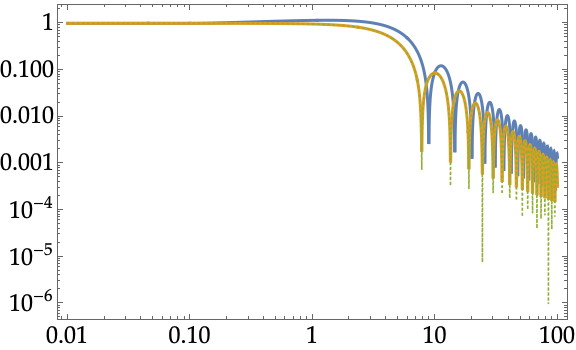

In [22]:
LogLogPlot[{Abs[Phifull[x,0.1,10,0.5]], Abs[Phifull[x,0.1,10,1/Sqrt[3]]], Abs[PhiRD[x]]},{x,0.01,100}, 
            PlotRange->Full, PlotStyle->{AbsoluteThickness[3],AbsoluteThickness[3],Dotted}]

-Graphics-
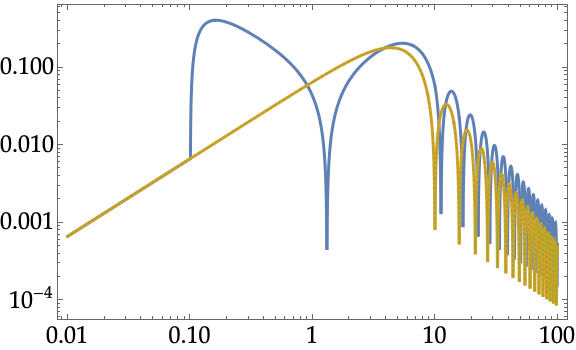

In [23]:
LogLogPlot[{Abs[Phipfull[x,0.1,10,0.5]], Abs[Phipfull[x,0.1,10,1/Sqrt[3]]], Abs[PhiRD'[x]]},{x,0.01,100}, 
            PlotRange->Full, PlotStyle->{AbsoluteThickness[3],AbsoluteThickness[3],Dotted}]

In [24]:
Isint[k_,etap_,etas1_,etas2_,cs_] = etap Sin[k etap] (2Phifull[etap,etas1,etas2,cs]^2 
                                                        + (Phifull[etap,etas1,etas2,cs] + etap Phipfull[etap,etas1,etas2,cs])^2);
Icint[k_,etap_,etas1_,etas2_,cs_] = etap Cos[k etap] (2Phifull[etap,etas1,etas2,cs]^2 
                                                        + (Phifull[etap,etas1,etas2,cs] + etap Phipfull[etap,etas1,etas2,cs])^2);

In [74]:
Iscs[k_,eta_,etas1_,etas2_,cs_] := k^2 NIntegrate[Isint[k,etap,etas1,etas2,cs], {etap,0,eta}];
Iccs[k_,eta_,etas1_,etas2_,cs_] := k^2 NIntegrate[Icint[k,etap,etas1,etas2,cs], {etap,0,eta}, WorkingPrecision->30];
Ics2bar[k_,eta_,etas1_,etas2_,cs_] := Abs[(Iscs[k,eta,etas1,etas2,cs]^2 + Iccs[k,eta,etas1,etas2,cs]^2)/2];

In [77]:
OGWcsbar[k_,eta_,etas1_,etas2_,cs_] := 8/243 UnitStep[1-k/2] (1-(k/2)^2)^2 (1/k)^2 Ics2bar[k,eta,etas1,etas2,cs]

In [78]:
etas11 = 0.1;
etas21 = 10;
cs1 = 0.5;

In [82]:
OGWcsbar[0.2,400,etas11,etas21,cs1] // Quiet // AbsoluteTiming

{3.15522, 1.31681}

In [89]:
OGW1List = Table[{10^logk,OGWcsbar[10^logk,400,etas11,etas21,cs1] // Quiet}, {logk,-1,Log10[2],0.01}]; // AbsoluteTiming

{472.687, Null}

In [35]:
IsRD[k_,eta_] = k^2 Integrate[etap Sin[k etap] (2PhiRD[etap]^2 + (PhiRD[etap] + etap PhiRD'[etap])^2), {etap,0.01,eta}, Assumptions->{eta>1,k>0}];
IcRD[k_,eta_] = k^2 Integrate[etap Cos[k etap] (2PhiRD[etap]^2 + (PhiRD[etap] + etap PhiRD'[etap])^2), {etap,0.01,eta}, Assumptions->{eta>1,k>0}];
IRD2bar[k_,eta_] = Abs[(IsRD[k,eta]^2 + IcRD[k,eta]^2)/2];

In [38]:
OGWRD[k_,eta_] = 8/243 UnitStep[1-k/2] (1-(k/2)^2)^2 (1/k)^2 IRD2bar[k,eta];

In [39]:
OGWRDList = Table[{10^logk, OGWRD[10^logk,400]}, {logk,-1,Log10[2],0.01}]; // AbsoluteTiming

{0.750879, Null}

In [40]:
Clear[w]

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.00733333], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[3]], 
 
>      Directive[PointSize[0.00733333], AbsoluteThickness[1.6], GrayLevel[0], 
 
                                  2
>       Dashing[{0, Small}]]}, {c   == 1/3 → 0.25 → 1/3, RD}, 
                                 s
 
>     LegendMarkers -> {{False, Automatic}, {False, Automatic}}, Joined -> {True, True}, 
 
>     LabelStyle -> Directive[GrayLevel[0], Large, FontFamily -> Palatino], 
 
>     LegendLayout -> Column], {0.35, 0.2}, Identity]]
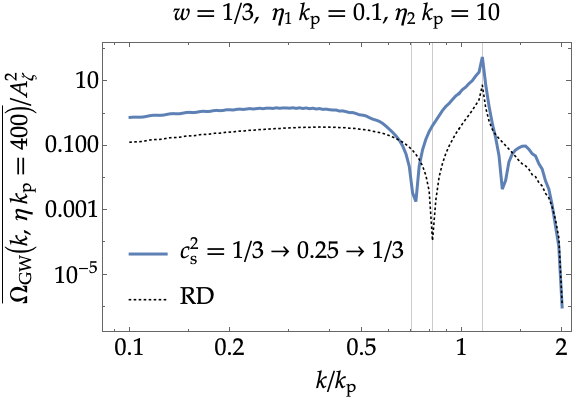

In [90]:
FigOGWdoublecs25 = 
ListLogLogPlot[{OGW1List, OGWRDList}, GridLines->{{Sqrt[2]cs1,Sqrt[2/3],2/Sqrt[3]},None}, PlotStyle->{AbsoluteThickness[3],{Black,Dotted}},
                FrameLabel->{{Row[{OverBar[Subscript[\[CapitalOmega],GW][k,Subscript[k,"p"]\[Eta]==400]], "/", Subscript[A,\[Zeta]]^2}], None},
                            {Row[{k, "/", Subscript[k,"p"]}], 
                            Row[{w==1, "/", 3, ",  ", Subscript[\[Eta], 1]Subscript[k,"p"] == 0.1, ", ", Subscript[\[Eta],2]Subscript[k,"p"] == 10}]}},
                PlotLegends->Placed[{Row[{Subscript[c,"s"]^2==1, "/", 3\[RightArrow]0.25\[RightArrow]1, "/", 3}], "RD"}, {0.35,0.2}]]

In [91]:
Export["anal/OGWdoublecs25.pdf", FigOGWdoublecs25];

## QCD trace anomaly

In [ ]:
If1[x_] := NIntegrate[(y^2-1)^(3/2) / (E^(x y)+1), {y,1,10^5}, MinRecursion->9]
If2[x_] := NIntegrate[E^(x y)(y^2-1)^(3/2) / (E^(x y)+1)^2 y, {y,1,10^5}, MinRecursion->9]
Ib1[x_] := NIntegrate[(y^2-1)^(3/2) / (E^(x y)-1), {y,1,10^5}, MinRecursion->9]
Ib2[x_] := NIntegrate[E^(x y)(y^2-1)^(3/2) / (E^(x y)-1)^2 y, {y,1,10^5}, MinRecursion->9]

In [ ]:
DeltafList = Table[{10^logx, 10^(4logx)(10^logx If2[10^logx]-4If1[10^logx])}, {logx,-2,2,0.01}]; // AbsoluteTiming
DeltabList = Table[{10^logx, 10^(4logx)(10^logx Ib2[10^logx]-4Ib1[10^logx])}, {logx,-2,2,0.01}]; // AbsoluteTiming

Out[49]:
 
 
 
 
 Out[50]:


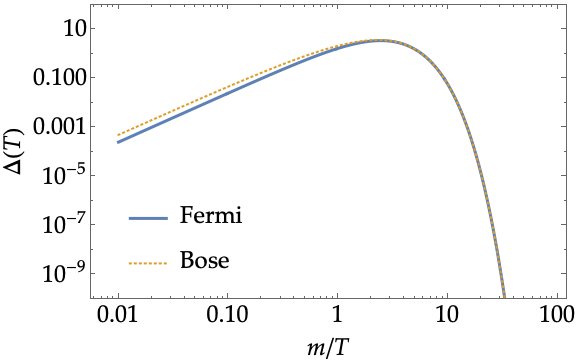

In [ ]:
FigTraceAnomaly = ListLogLogPlot[{DeltafList,DeltabList}, PlotStyle->{AbsoluteThickness[3],{AbsoluteThickness[2],Dotted}}, PlotRange->{10^-10,10^2}, 
                                   FrameLabel->{Row[{m, "/", T}], \[CapitalDelta][T]}, PlotLegends->Placed[{"Fermi","Bose"}, {0.2,0.2}]]

In [ ]:
Export["TraceAnomaly.pdf",FigTraceAnomaly];

5 + 3 w                                5 + 3 w
BesselJ[-----------, Sqrt[w] x] C[1]   BesselY[-----------, Sqrt[w] x] C[2]
        2 (1 + 3 w)                            2 (1 + 3 w)
------------------------------------ + ------------------------------------
               (5 + 3 w)/(2 + 6 w)                    (5 + 3 w)/(2 + 6 w)
  (2 x + 6 w x)                          (2 x + 6 w x)
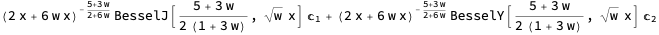

In [18]:
Phi[x] /. DSolve[{Phi''[x]+6(1+w)/(1+3w)/x Phi'[x]+w Phi[x] == 0}, Phi[x], x][[1]] 

In [7]:
WG[x_] = Exp[-x^2/2];
WTH[x_] = 3(Sin[x]-x Cos[x])/x^3;
Ts[x_] = WTH[x/Sqrt[3]];

2           2 x       2       2 x                        2 x
81 (3 + x  - 3 Cos[-------] + x  Cos[-------] - 2 Sqrt[3] x Sin[-------])
                   Sqrt[3]           Sqrt[3]                    Sqrt[3]
-------------------------------------------------------------------------
                                    2
                                   x   3
                                2 E   x
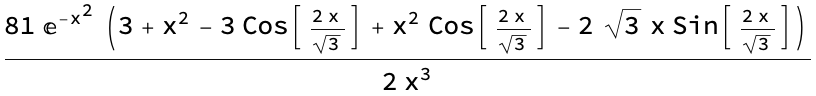

In [19]:
x^3 WG[x]^2 Ts[x]^2 // TrigExpand // TrigReduce

In [27]:
rG = 16/81 NIntegrate[x^3 WG[x]^2 Ts[x]^2, {x,0,10^3}]
rTH = 16/81 NIntegrate[x^3 WTH[x]^2 Ts[x]^2, {x,0,10^3}]

0.086655
1.0607

In [29]:
0.003/rG
0.003/rTH

0.0346201
0.00282831